# *Data Load*

In [1]:
import pandas as pd
from pshmodule.utils import filemanager as fm

In [2]:
df = fm.load('../data/df_users_whole_info.pickle')

extension : .pickle
Loaded 396808 records from ../data/df_users_whole_info.pickle


In [3]:
df.head()

,user_uuid,marketing_channel,sex,age_group,date_joined,os,visits,revenue
0,05b0058df377da90c21c585649cbf415,0,0,1,4,0,23,304.0
1,28b7062943065c84bb902a0c1d018398,1,0,0,4,0,5,195.0
2,f8c30b791fbe2d6c80585b20fb6fdbe0,0,0,1,4,0,1,78.0
3,91cd8505d196bea35d48f4f1eacbc106,0,1,1,4,1,18,202.0
4,4b34dfb277abb6ad04dcf6968fe416d0,0,0,1,4,0,9,197.0


# 

# *Data Validation*

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

● user_uuid: 가입 회원의 (unique) id

● marketing_channel	: 회원가입 마케팅 채널 (channel_A, channel_B)

● age_group: 나이대 (예시: 20-29, 30-39...)

● sex: 성별 (male, female)

● os: device os type (android, iOS)

● date_joined: 회원가입일자 (yyyy-mm-dd 형식)

● visit: 사용자가 가입일 이후부터 데이터 추출 날짜까지 앱을 방문한 총 횟수

● revenue: 데이터 추출 날짜까지 사용자가 발생시킨 매출

### divide by user

In [5]:
df_A = df[df.marketing_channel.apply(lambda x: x==0)]
df_B = df[df.marketing_channel.apply(lambda x: x==1)]

In [6]:
print(df_A.marketing_channel.value_counts())
print(df_B.marketing_channel.value_counts())

0    321485
Name: marketing_channel, dtype: int64
1    75323
Name: marketing_channel, dtype: int64


In [7]:
revenue_A = df_A.revenue.tolist()
revenue_B = df_B.revenue.tolist()

In [8]:
print(revenue_A[:10])
print(revenue_B[:10])

[304.0, 78.0, 202.0, 197.0, 906.0, 64.0, 49.0, 93.0, 517.0, 101.0]
[195.0, 149.0, 825.0, 427.0, 104.0, 216.0, 89.0, 155.0, 184.0, 268.0]


### data check

In [9]:
array_A = np.array(revenue_A)
array_B = np.array(revenue_B)

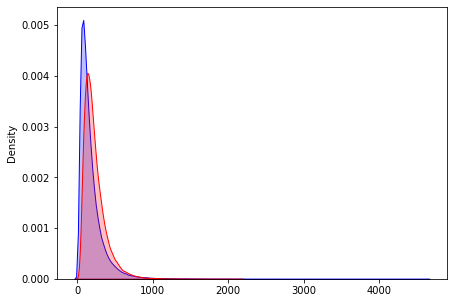

In [10]:
plt.figure(figsize=(7, 5))

sns.kdeplot(data=array_A, color='blue', shade=True)
sns.kdeplot(data=array_B, color='red', shade=True)
plt.show()

### user's revenue t-test 

<b>귀무가설</b> : 마케팅 채널 A와 마케팅 채널 B의 매출액 평균의 차이가 없다.<br>

In [11]:
mean_A = round(np.mean(revenue_A), 3)
mean_B = round(np.mean(revenue_B), 3)
std_A = round(np.std(revenue_A), 3)
std_B = round(np.std(revenue_A), 3)

In [12]:
print(f"mean_A : {mean_A}")
print(f"mean_B : {mean_B}")
print(f"std_A : {std_A}")
print(f"std_B : {std_B}")

mean_A : 177.702
mean_B : 229.958
std_A : 168.451
std_B : 168.451


In [15]:
ttest = stats.ttest_ind(revenue_A, revenue_B)

In [16]:
ttest

Ttest_indResult(statistic=-78.14289835375084, pvalue=0.0)

# 

# *Result*

<big><b>귀무가설</b></big>(마케팅 채널 A와 마케팅 채널 B의 매출액 평균의 차이가 없다) <big><b>기각</b></big><br>

<big><b>집단 A</b></big>의 측정값(M = 177.754, SD = 168.538)은 <big><b>집단 B</b></big>의 측정값(M = 229.931, SD = 168.538)보다 통계적으로 유의미하게 낮다.<br>(t-test : 78.143, p-value : 0.0 < 0.01)

# 